In [1]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path


proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

print(proj_root)

d:\Work\repos\RL\phd-rl-algos


In [2]:
import numpy as np
from rl_envs_forge.envs.network_graph.network_graph import NetworkGraph

from dqn.opinion_dynamics.utils.experiment import build_environment

from dynamic_programming.opinion_dynamics.algos import compute_average_error, compute_final_average_error, generate_full_control_policy
from dynamic_programming.opinion_dynamics.common.viz import plot_opinions_over_time


In [3]:
def create_state_grid(N, nx):
    grid_range = np.linspace(0, 1, nx)
    grids = [grid_range for _ in range(N)]
    return grids

def run_policy(env, policy, nx, step_duration, max_steps=1000):
    """
    Run the simulation using a given policy with a maximum number of steps.

    Args:
        env: The environment with network properties.
        policy: The control policy to be used.
        nx: Number of grid points per dimension (used for mapping states to grid indices).
        step_duration: Duration of each policy application.
        tolerance: Tolerance for the mean opinion to stop the simulation.
        max_steps: Maximum number of steps to run.

    Returns:
        opinions_over_time: Array of opinions over the entire simulation.
        time_points: Corresponding time points for each opinion snapshot.
        rewards_over_time: Collected rewards at each step.
    """
    N = env.num_agents
    opinions_over_time = []
    time_points = []
    rewards_over_time = []
    current_time = 0.0
    state, _ = env.reset()
    grids = create_state_grid(N, nx)

    for step in range(max_steps):
        idx = tuple(np.abs(grids[i] - state[i]).argmin() for i in range(N))
        action = policy.get(idx, np.zeros(N))
        
        print(action)
        next_state, reward, done, truncated, _ = env.step(action, env.tau)
        
        opinions_over_time.append(next_state.copy())
        rewards_over_time.append(reward)
        time_points.append(current_time)
        print(f"Step: {step}, Time: {current_time}, Reward: {reward}")
        
        current_time += step_duration
        state = next_state

        if done or truncated:
            print(f"Ran for {step} steps: done={done}, truncated={truncated}")
            break
        
    return np.array(opinions_over_time), np.array(time_points), np.array(rewards_over_time)


[0.1 0.1 0.1 0.1]
Step: 0, Time: 0.0, Reward: -2.491662720872214
[0.1 0.1 0.1 0.1]
Step: 1, Time: 0.01, Reward: -2.251104796520189
[0.1 0.1 0.1 0.1]
Step: 2, Time: 0.02, Reward: -2.0354412032660774
[0.1 0.1 0.1 0.1]
Step: 3, Time: 0.03, Reward: -1.842087529568285
[0.1 0.1 0.1 0.1]
Step: 4, Time: 0.04, Reward: -1.6687285472087416
[0.1 0.1 0.1 0.1]
Step: 5, Time: 0.05, Reward: -1.5132900796309419
[0.1 0.1 0.1 0.1]
Step: 6, Time: 0.060000000000000005, Reward: -1.3739138203282448
[0.1 0.1 0.1 0.1]
Step: 7, Time: 0.07, Reward: -1.2489347908498165
[0.1 0.1 0.1 0.1]
Step: 8, Time: 0.08, Reward: -1.1368611607723407
[0.1 0.1 0.1 0.1]
Step: 9, Time: 0.09, Reward: -1.036356181292696
[0.1 0.1 0.1 0.1]
Step: 10, Time: 0.09999999999999999, Reward: -0.9462220102995884
[0.1 0.1 0.1 0.1]
Step: 11, Time: 0.10999999999999999, Reward: -0.8653852302106037
[0.1 0.1 0.1 0.1]
Step: 12, Time: 0.11999999999999998, Reward: -0.7928838808100728
[0.1 0.1 0.1 0.1]
Step: 13, Time: 0.12999999999999998, Reward: -0.7278

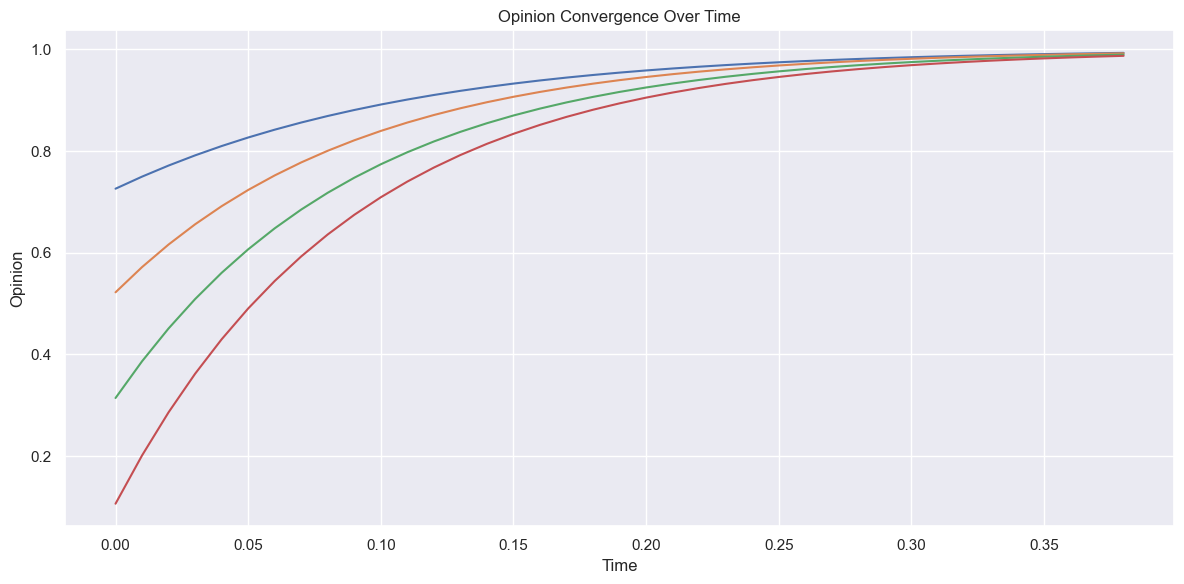

In [4]:
def create_adjacency_matrix_from_links(num_nodes, links):
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for link in links:
        from_node, to_node = link
        # adjacency_matrix[from_node, to_node] = 1
        adjacency_matrix[to_node, from_node] = 1

    return adjacency_matrix

links = [
        (1, 3),
        (3, 2),
        (2, 3),
        (2, 0),
        (0, 2),
        (1, 2),
        (0, 1),
        # (3, 4),
        # (4, 3)
    ]

num_nodes = 4
connectivity_matrix = create_adjacency_matrix_from_links(num_nodes, links)
# connectivity_matrix = normalize_adjacency_matrix(connectivity_matrix)

initial_opinions = np.linspace(0.7, 0, num_nodes)
    
env = NetworkGraph(
        connectivity_matrix=connectivity_matrix,
        initial_opinions=initial_opinions,
        max_u=0.1,
        budget=100.0,
        desired_opinion=1.0,
        tau=0.01,
        max_steps=100,
        opinion_end_tolerance=0.01,
    )
num_steps = 50
nx = 5

policy_broadcast = generate_full_control_policy(env, nx)

opinions_over_time, time_points, rewards = run_policy(env, policy_broadcast, nx=nx, step_duration=env.tau, max_steps=num_steps)
plot_opinions_over_time(opinions_over_time, time_points)

[0.2 0.2 0.2 0.2]
Step: 0, Time: 0.0, Reward: -2.3306919855242194
[0.2 0.2 0.2 0.2]
Step: 1, Time: 0.1, Reward: -1.8809542170878772
[0.2 0.2 0.2 0.2]
Step: 2, Time: 0.2, Reward: -1.5361647649235768
[0.2 0.2 0.2 0.2]
Step: 3, Time: 0.30000000000000004, Reward: -1.2706728474279143
[0.2 0.2 0.2 0.2]
Step: 4, Time: 0.4, Reward: -1.0653867615101635
[0.2 0.2 0.2 0.2]
Step: 5, Time: 0.5, Reward: -0.9060293855377228
[0.2 0.2 0.2 0.2]
Step: 6, Time: 0.6, Reward: -0.7818722882723358
[0.2 0.2 0.2 0.2]
Step: 7, Time: 0.7, Reward: -0.6848140563657226
[0.2 0.2 0.2 0.2]
Step: 8, Time: 0.7999999999999999, Reward: -0.6087068881644021
[0.2 0.2 0.2 0.2]
Step: 9, Time: 0.8999999999999999, Reward: -0.5488627365574328
[0.2 0.2 0.2 0.2]
Step: 10, Time: 0.9999999999999999, Reward: -0.501689667463546
[0.2 0.2 0.2 0.2]
Step: 11, Time: 1.0999999999999999, Reward: -0.4644229396950954
[0.2 0.2 0.2 0.2]
Step: 12, Time: 1.2, Reward: -0.4349252148172954
[0.2 0.2 0.2 0.2]
Step: 13, Time: 1.3, Reward: -0.41153740430529

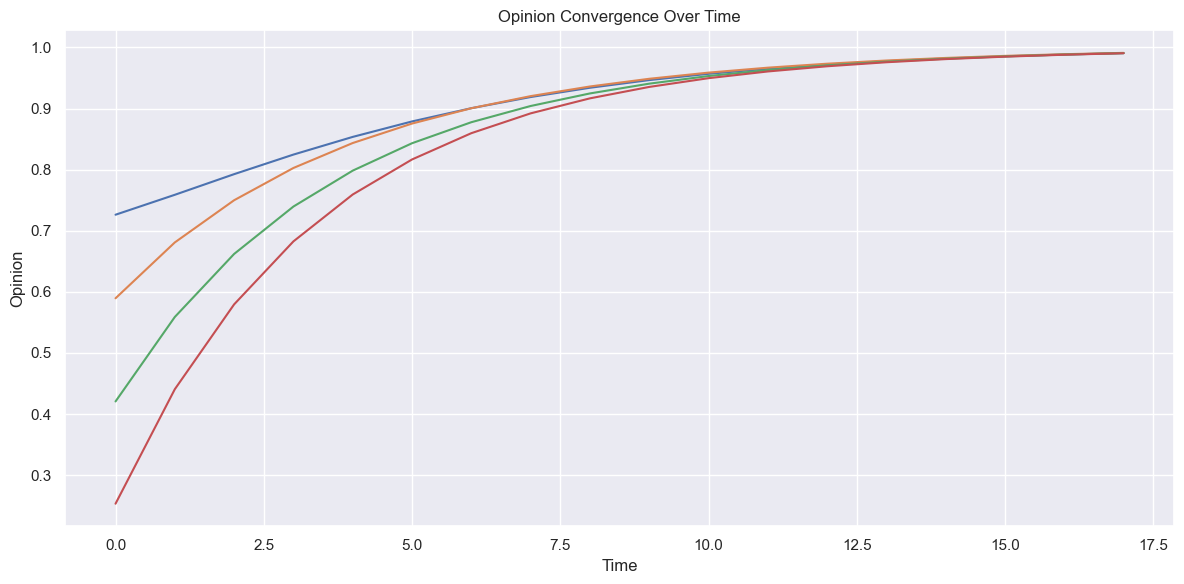

In [5]:
env = build_environment()
num_steps = 50
nx = 5

policy_broadcast = generate_full_control_policy(env, nx)

opinions_over_time, time_points, rewards = run_policy(env, policy_broadcast, nx=nx, step_duration=env.tau, max_steps=num_steps)
plot_opinions_over_time(opinions_over_time)